In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### 아이리스 품종 예측 실행

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [3]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
df=pd.read_csv("/content/gdrive/My Drive/deepLearning/data/iris.csv", 
               names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

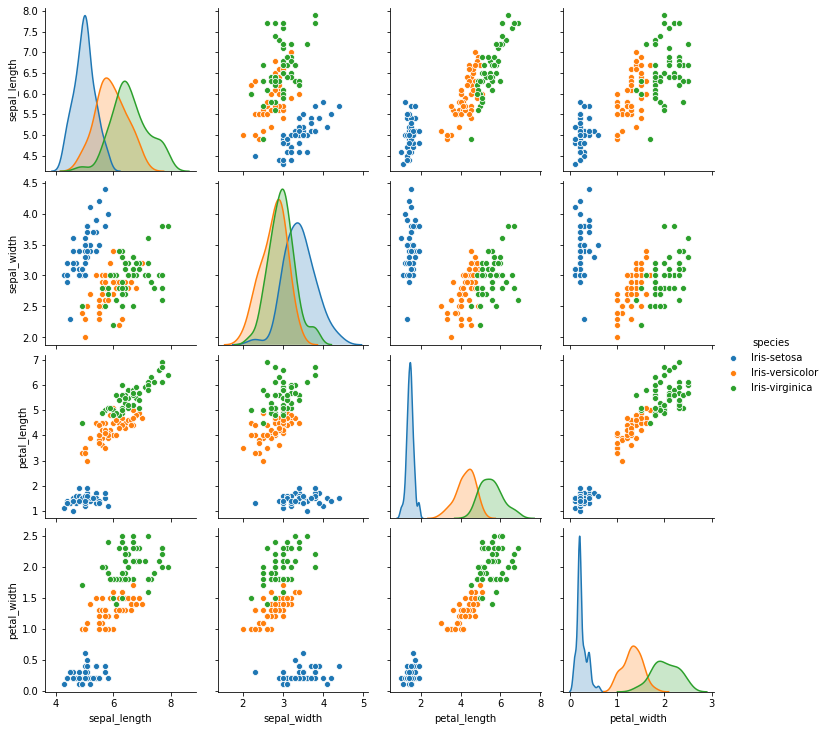

In [6]:
sns.pairplot(df, hue="species")
plt.show()

In [7]:
dataset = df.values
X = dataset[:, 0:4].astype(float)
Y_obj = dataset[:, 4]

In [8]:
# 문자열을 숫자로 변환

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj) # 1, 2, 3
Y_encoded = np_utils.to_categorical(Y)  # 100, 010, 001

In [9]:
# 모델 설정

model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))  # 32, 16, 8, 4
model.add(Dense(3, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [11]:
model.fit(X, Y_encoded, epochs=50, batch_size=1)

Epoch 1/50
150/150 [==============================] - 0s 905us/step - loss: 1.6271 - accuracy: 0.5533
Epoch 2/50
150/150 [==============================] - 0s 811us/step - loss: 0.6383 - accuracy: 0.7000
Epoch 3/50
150/150 [==============================] - 0s 885us/step - loss: 0.5596 - accuracy: 0.7733
Epoch 4/50
150/150 [==============================] - 0s 922us/step - loss: 0.4948 - accuracy: 0.8200
Epoch 5/50
150/150 [==============================] - 0s 903us/step - loss: 0.4555 - accuracy: 0.8133
Epoch 6/50
150/150 [==============================] - 0s 917us/step - loss: 0.4224 - accuracy: 0.8867
Epoch 7/50
150/150 [==============================] - 0s 941us/step - loss: 0.3882 - accuracy: 0.9000
Epoch 8/50
150/150 [==============================] - 0s 884us/step - loss: 0.3627 - accuracy: 0.8933
Epoch 9/50
150/150 [==============================] - 0s 840us/step - loss: 0.3512 - accuracy: 0.9067
Epoch 10/50
150/150 [==============================] - 0s 895us/step - loss: 0.325

In [12]:
print("Accuracy: %.4f" %(model.evaluate(X, Y_encoded)[1]))

5/5 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9800
Accuracy: 0.9800
